# MeshPy
[web](https://mathema.tician.de/software/meshpy/) , [examples](https://github.com/inducer/meshpy/tree/master/examples)

*Latest vesrion, Released: Oct 11, 2018* , install with:

    pip install pybind11 meshpy pyvtk

In order to generate these 2D and 3D meshes, MeshPy provides Python interfaces to a few well-regarded mesh generators:

* Triangle by J. Shewchuk.
* TetGen by Hang Si.



In [2]:
!pip install pybind11 meshpy pyvtk --user

     |████████████████████████████████| 296kB 80kB/s eta 0:00:011
     |████████████████████████████████| 481kB 435kB/s eta 0:00:01
     |████████████████████████████████| 61kB 519kB/s eta 0:00:01
  Created wheel for meshpy: filename=MeshPy-2018.2.1-cp37-cp37m-linux_x86_64.whl size=415508 sha256=e13f2e2a16e383e503faaee5f09ab66aa8d0ea29c54bc2f6c40423a8785dfe47
  Stored in directory: /home/user/.cache/pip/wheels/43/f6/00/0d863cde6a8531db3cab30dce6a6f86c7990188b2fe5e4bb2a
  Created wheel for pyvtk: filename=PyVTK-0.5.18-cp37-none-any.whl size=24735 sha256=3f7256fa529de9cf6469f901b61fb7fb33b4076f32f8bb61e0e23425bae1a0cd
  Stored in directory: /home/user/.cache/pip/wheels/7d/73/d6/4c3ce104624b4459b6dbc3329235f68815d35e5d6c0f3aac83
  Created wheel for pytools: filename=pytools-2020.1-py2.py3-none-any.whl size=59604 sha256=d3664787e0d0c202cde3e4d76dfa80848412e4f6da4e4d6311f40cd0b29c7b72
  Stored in directory: /home/user/.cache/pip/wheels/6f/da/1b/946775a88291378182ed92c9800d6d0ebc2a554cb89829

In [4]:
from __future__ import absolute_import
from __future__ import print_function
from six.moves import range
def simpleSquare():
    import meshpy.triangle as triangle

    points = [ (1,1),(-1,1),(-1,-1),(1,-1)]

    def round_trip_connect(start, end):
      result = []
      for i in range(start, end):
        result.append((i, i+1))
      result.append((end, start))
      return result

    info = triangle.MeshInfo()
    info.set_points(points)
    info.set_facets(round_trip_connect(0, len(points)-1))

    mesh = triangle.build(info, max_volume=1e-3, min_angle=25)
    

    print("A")
    triangle.write_gnuplot_mesh("triangles.dat", mesh)

simpleSquare()

A


In [5]:
from meshpy.tet import MeshInfo, build 

mesh_info = MeshInfo()
mesh_info.set_points([
    (0,0,0), (2,0,0), (2,2,0), (0,2,0),
    (0,0,12), (2,0,12), (2,2,12), (0,2,12),
    ])
mesh_info.set_facets([
    [0,1,2,3],
    [4,5,6,7],
    [0,4,5,1],
    [1,5,6,2],
    [2,6,7,3],
    [3,7,4,0],
    ])
mesh = build(mesh_info)
print ("Mesh Points:")
for i, p in enumerate(mesh.points):
    print( i, p)
print( "Point numbers in tetrahedra:")
for i, t in enumerate(mesh.elements):
    print( i, t)
mesh.write_vtk("test.vtk")


Mesh Points:
0 [0.0, 0.0, 0.0]
1 [2.0, 0.0, 0.0]
2 [2.0, 2.0, 0.0]
3 [0.0, 2.0, 0.0]
4 [0.0, 0.0, 12.0]
5 [2.0, 0.0, 12.0]
6 [2.0, 2.0, 12.0]
7 [0.0, 2.0, 12.0]
8 [2.0, 2.0, 6.0]
9 [0.0, 0.0, 6.0]
10 [0.0, 2.0, 6.0]
11 [2.0, 0.0, 6.0]
Point numbers in tetrahedra:
0 [2, 10, 0, 8]
1 [2, 0, 1, 8]
2 [4, 11, 9, 8]
3 [0, 10, 9, 8]
4 [6, 10, 4, 7]
5 [4, 11, 8, 5]
6 [0, 11, 1, 8]
7 [2, 10, 3, 0]
8 [6, 10, 8, 4]
9 [5, 4, 6, 8]
10 [0, 11, 8, 9]
11 [4, 10, 8, 9]


***
## Esfera

In [6]:
from __future__ import absolute_import
from six.moves import range
def  ball():
    from math import pi, cos, sin
    from meshpy.tet import MeshInfo, build
    from meshpy.geometry import \
            generate_surface_of_revolution, EXT_OPEN, \
            GeometryBuilder

    r = 3

    points = 10
    dphi = pi/points

    def truncate(r):
        if abs(r) < 1e-10:
            return 0
        else:
            return r

    rz = [(truncate(r*sin(i*dphi)), r*cos(i*dphi)) for i in range(points+1)]

    geob = GeometryBuilder()
    geob.add_geometry(*generate_surface_of_revolution(rz,
            closure=EXT_OPEN, radial_subdiv=10))

    mesh_info = MeshInfo()
    geob.set(mesh_info)

    mesh = build(mesh_info)
    mesh.write_vtk("ball.vtk")
    
ball()

***
## Box in box

In [7]:
from __future__ import absolute_import
from __future__ import print_function
def boxInBox():
    import numpy
    from meshpy.tet import MeshInfo, build
    from meshpy.geometry import GeometryBuilder, Marker, make_box

    geob = GeometryBuilder()

    box_marker = Marker.FIRST_USER_MARKER
    extent_small = 0.3*numpy.ones(3, dtype=numpy.float64)
    points, facets, _, _ = \
            make_box(-extent_small, extent_small)

    geob.add_geometry(points, facets, facet_markers=box_marker)

    points, facets, _, facet_markers = \
            make_box(numpy.array([-1, -1, -1]), numpy.array([1, 1, 5]))

    geob.add_geometry(points, facets, facet_markers=facet_markers)

    mesh_info = MeshInfo()
    geob.set(mesh_info)
    #mesh_info.set_holes([(0, 0, 0)])

    # region attributes
    mesh_info.regions.resize(1)
    mesh_info.regions[0] = (
            # point in region
            [0, 0, 0] + [
                # region number
                1,
                # max volume in region
                0.001])

    mesh = build(mesh_info, max_volume=0.06,
            volume_constraints=True, attributes=True)
    print(("%d elements" % len(mesh.elements)))
    mesh.write_vtk("box-in-box.vtk")
    
boxInBox()

2731 elements


***
## tetgen.tet

In [8]:
def main():
    from meshpy.tet import MeshInfo, build
    from meshpy.geometry import \
            generate_surface_of_revolution, \
            GeometryBuilder

    simple_rz = [
        (0,0),
        (1,1),
        (1,2),
        (0,3),
        ]


    geob = GeometryBuilder()
    geob.add_geometry(*generate_surface_of_revolution(simple_rz))

    mesh_info = MeshInfo()
    geob.set(mesh_info)

    #mesh_info.save_nodes("test")
    #mesh_info.save_poly("test")
    #mesh_info.load_poly("test")
    mesh = build(mesh_info)
    mesh.write_vtk("my_mesh.vtk")

In [31]:
def cylinder():
    from math import pi, cos, sin
    from meshpy.tet import MeshInfo, build
    from meshpy.geometry import \
            generate_surface_of_revolution, EXT_OPEN, \
            GeometryBuilder

    r = 1
    l = 1

    rz = [(0,0), (r,0), (r,l), (0,l)]

    geob = GeometryBuilder()
    geob.add_geometry(*generate_surface_of_revolution(rz,
            radial_subdiv=20, ring_markers=[1,2,3]))

    mesh_info = MeshInfo()
    geob.set(mesh_info)

    mesh = build(mesh_info, max_volume=0.01)
    mesh.write_vtk("cylinder.vtk")
    mesh.write_neu(open("cylinder.neu", "w"), {
        1: ("minus_z", 1),
        2: ("outer", 2),
        3: ("plus_z", 3),
        })
    
cylinder()

***

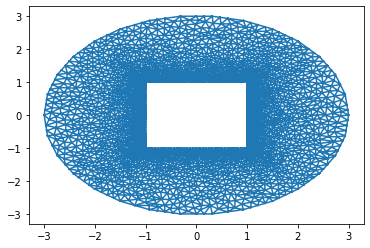

In [33]:
from __future__ import division
from __future__ import absolute_import

import meshpy.triangle as triangle
import numpy as np
import numpy.linalg as la
from six.moves import range


def round_trip_connect(start, end):
    return [(i, i+1) for i in range(start, end)] + [(end, start)]


def trianglesss():
    points = [(1, 0), (1, 1), (-1, 1), (-1, -1), (1, -1), (1, 0)]
    facets = round_trip_connect(0, len(points)-1)

    circ_start = len(points)
    points.extend(
            (3 * np.cos(angle), 3 * np.sin(angle))
            for angle in np.linspace(0, 2*np.pi, 30, endpoint=False))

    facets.extend(round_trip_connect(circ_start, len(points)-1))

    def needs_refinement(vertices, area):
        bary = np.sum(np.array(vertices), axis=0)/3
        max_area = 0.001 + (la.norm(bary, np.inf)-1)*0.01
        return bool(area > max_area)

    info = triangle.MeshInfo()
    info.set_points(points)
    info.set_holes([(0, 0)])
    info.set_facets(facets)

    mesh = triangle.build(info, refinement_func=needs_refinement)

    mesh_points = np.array(mesh.points)
    mesh_tris = np.array(mesh.elements)

    import matplotlib.pyplot as pt
    %matplotlib inline
    pt.triplot(mesh_points[:, 0], mesh_points[:, 1], mesh_tris)
    pt.show()
    
trianglesss()

In [48]:
from __future__ import absolute_import
from __future__ import print_function
from six.moves import zip
def airFoil():
    import numpy
    #from math import pi, cos, sin
    from meshpy.tet import MeshInfo, build
    from meshpy.geometry import GeometryBuilder, Marker, \
            generate_extrusion, make_box

    from meshpy.naca import get_naca_points

    geob = GeometryBuilder()

    box_marker = Marker.FIRST_USER_MARKER

    wing_length = 2
    wing_subdiv = 5

    rz_points = [
            (0, -wing_length*1.05),
            (0.7, -wing_length*1.05),
            ] + [
                (r, x) for x, r in zip(
                    numpy.linspace(-wing_length, 0, wing_subdiv, endpoint=False),
                    numpy.linspace(0.8, 1, wing_subdiv, endpoint=False))
            ] + [(1, 0)] + [
                (r, x) for x, r in zip(
                    numpy.linspace(wing_length, 0, wing_subdiv, endpoint=False),
                    numpy.linspace(0.8, 1, wing_subdiv, endpoint=False))
            ][::-1] + [
            (0.7, wing_length*1.05),
            (0, wing_length*1.05)
            ]

    geob.add_geometry(*generate_extrusion(
        rz_points=rz_points,
        base_shape=get_naca_points("0012", verbose=False, number_of_points=20),
        ring_markers=(wing_subdiv*2+4)*[box_marker]))

    from meshpy.tools import make_swizzle_matrix
    swizzle_matrix = make_swizzle_matrix("z:x,y:y,x:z")
    geob.apply_transform(lambda p: numpy.dot(swizzle_matrix, p))

    def deform_wing(p):
        x, y, z = p
        return numpy.array([
            x,
            y + 0.1*abs(x/wing_length)**2,
            z + 0.8*abs(x/wing_length) ** 1.2])

    geob.apply_transform(deform_wing)

    points, facets, _, facet_markers = make_box(
            numpy.array([-wing_length-1, -1, -1.5]),
            numpy.array([wing_length+1, 1, 3]))

    geob.add_geometry(points, facets, facet_markers=facet_markers)

    mesh_info = MeshInfo()
    geob.set(mesh_info)
    mesh_info.set_holes([(0, 0, 0.5)])

    mesh = build(mesh_info)
    print("%d elements" % len(mesh.elements))
    mesh.write_vtk("airfoil3d.vtk")
    
airFoil()

30389 elements


In [25]:
import meshpy

radius=10
height=30
cilinder=meshpy.geometry.make_cylinder(radius, height, radial_subdivisions=10, height_subdivisions=1)
cilinder[3]

[5, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 6]

***
# gmsh_interop
*Latest version, Released: Feb 12, 2019*

    pip install gmsh_interop
 
 

## PyMesh

[pyMesh](https://pymesh.readthedocs.io/en/latest/)

In [14]:
import pybind11


In [3]:

!pip install pymesh --user



In [51]:
!pip install meshio


     |████████████████████████████████| 133kB 270kB/s eta 0:00:01
